In [5]:
%matplotlib inline
import cvxpy as cvx
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
orig_df = pd.read_csv("../../datasets/l_internet-mi-2013-11-01_09.csv")
orig_data = orig_df["l_internet"]
sorted_data = np.sort(orig_data)

In [2]:
df = pd.read_csv("../javamsketch/results/milan_log_1513580482.csv")

In [2]:
sketches = ["moment", "tdigest", "yahoo", "sampling", "spark_gk", "histogram"]
sketches = ["moment", "histogram"]

In [1]:
def get_error(sorted_data, x, p, is_int=False):
    if is_int:
        x = round(x)
    n = len(sorted_data)
    li = np.searchsorted(sorted_data, x, side="left")
    ri = np.searchsorted(sorted_data, x, side="right")
    qi = int(p * n)
    if ri < qi:
        return (qi-ri)*1.0/n
    elif li > qi:
        return (li-qi)*1.0/n
    else:
        return 0.0

In [3]:
def gen_plots(df, sorted_data, name):
    dft = df[df["trial"] > 0].groupby(
        ["sketch", "size_param", "q"]
    )[
        "quantile_estimate", "train_time", 
        "query_time", "space", "merge_time",
        "bound_size"
    ].mean()
    dft = dft.reset_index()
    dft["error"] = dft.apply(
        lambda r: get_error(
            sorted_data, r["quantile_estimate"], r["q"],
            is_int=False
        ),
        axis=1
    )
    dft["rerror"] = dft["error"] / np.minimum(dft["q"],(1-dft["q"]))
    dfg = dft.groupby([
        "sketch", "size_param"
    ])[
        "train_time","merge_time", "query_time", 
        "space", "error", "rerror", "bound_size"
      ].mean()
    dfs = dfg.reset_index().sort_values(["size_param"])
    
    plt.figure()
    for alg in sketches:
        c_df = dfs[dfs["sketch"] == alg]
        plt.loglog(
            c_df["space"], 
            (c_df["query_time"])*1e-9,
            label=alg,
            marker="."
        )
    plt.xlabel("Size (bytes)")
    plt.ylabel("Query Time (s)")
    plt.legend(loc=4)
    plt.title(name)
    plt.savefig("{}_query_time.pdf".format(name))
    
    n = len(orig_data)
    plt.figure()
    for alg in sketches:
        c_df = dfs[dfs["sketch"] == alg]
        plt.loglog(
            c_df["space"], 
            (c_df["merge_time"])/n,
            label=alg,
    #         lw=0,
            marker="."
        )
    plt.xlabel("Size (bytes)")
    plt.ylabel("Merge Time (ns)")
    plt.legend(loc=4)
    plt.title(name)
    plt.savefig("{}_merge_time.pdf".format(name))
    
    plt.figure()
    for alg in sketches:
        c_df = dfs[dfs["sketch"] == alg]
        plt.loglog(
            c_df["space"],
            c_df["error"], 
            label=alg,
            marker="."
        )
    plt.xlabel("Size (Bytes)")
    plt.ylabel("Avg Error")
    plt.legend()
    plt.title(name)
    plt.savefig("{}_error.pdf".format(name))
    
    plt.figure()
    for alg in sketches:
        c_df = dfs[dfs["sketch"] == alg]
        plt.loglog(
            c_df["space"],
            c_df["bound_size"], 
            label=alg,
            marker="."
        )
    plt.xlabel("Size (Bytes)")
    plt.ylabel("Avg Bound Size")
    plt.legend()
    plt.title(name)
    plt.savefig("{}_bound.pdf".format(name))
    
    return dft

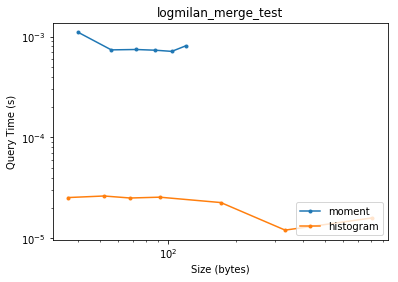

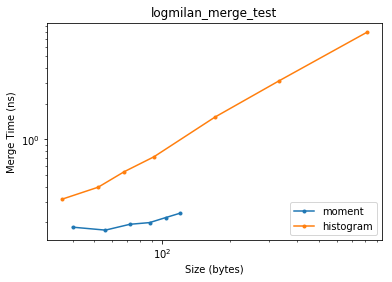

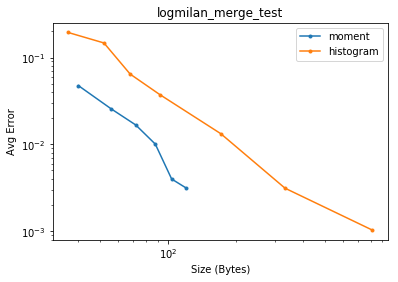

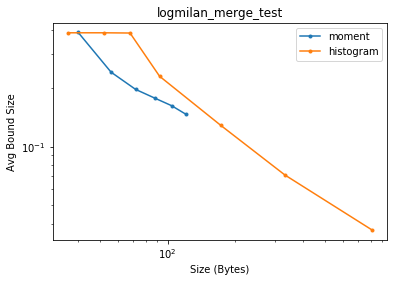

In [11]:
df = pd.read_csv("../javamsketch/results/logmilan_merge_test_1514611829.csv")
dft = gen_plots(df, sorted_data, "logmilan_merge_test")

In [9]:
dft = df[df["trial"] > 0].groupby(
    ["sketch", "size_param", "q"]
)["quantile_estimate", "train_time", "query_time", "merge_time", "space"].mean()
dft = dft.reset_index()
dft["error"] = dft.apply(
    lambda r: get_error(
        sorted_data, r["quantile_estimate"], r["q"],
        is_int=False
    ),
    axis=1
)
dft["rerror"] = dft["error"] / np.minimum(dft["q"],(1-dft["q"]))
dfg = dft.groupby([
    "sketch", "size_param"
])["train_time", "query_time", "merge_time", "space", "error", "rerror"].mean()
dfs = dfg.reset_index().sort_values(["size_param"])

In [10]:
sketches = ["moment", "tdigest", "yahoo", "sampling", "spark_gk"]

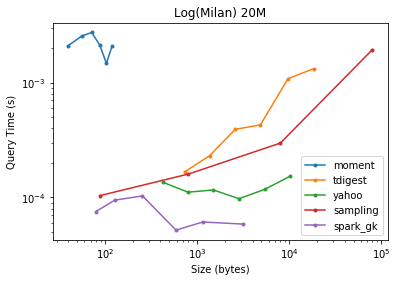

In [12]:
plt.figure()
for alg in sketches:
    c_df = dfs[dfs["sketch"] == alg]
    plt.loglog(
        c_df["space"], 
        (c_df["query_time"])*1e-9,
        label=alg,
#         lw=0,
        marker="."
    )
# plt.ylim(.01, 10)
plt.xlabel("Size (bytes)")
plt.ylabel("Query Time (s)")
plt.legend(loc=4)
plt.title("Log(Milan) 20M")
plt.savefig("logmilan_merge_query_time.pdf")

In [13]:
num_cells = len(orig_data) / 100

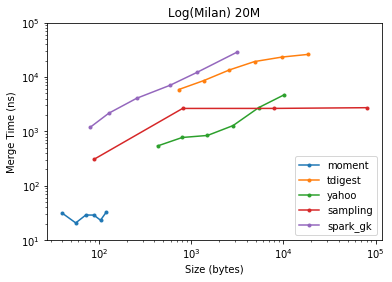

In [17]:
plt.figure()
for alg in sketches:
    c_df = dfs[dfs["sketch"] == alg]
    plt.loglog(
        c_df["space"], 
        (c_df["merge_time"])/num_cells,
        label=alg,
#         lw=0,
        marker="."
    )
plt.ylim(10, 10**5)
plt.xlabel("Size (bytes)")
plt.ylabel("Merge Time (ns)")
plt.legend(loc=4)
plt.title("Log(Milan) 20M")
plt.savefig("logmilan_merge_time.pdf")

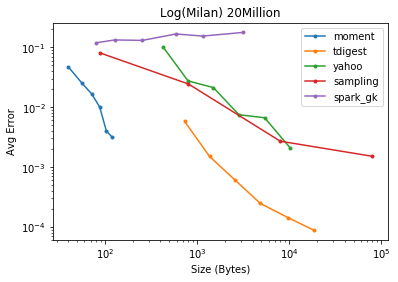

In [13]:
plt.figure()
for alg in sketches:
    c_df = dfs[dfs["sketch"] == alg]
    plt.loglog(
        c_df["space"],
        c_df["error"], 
        label=alg,
        marker="."
    )
plt.xlabel("Size (Bytes)")
plt.ylabel("Avg Error")
plt.legend()
plt.title("Log(Milan) 20Million")
plt.savefig("l_milan_merge_error.pdf")

In [15]:
dft[(dft["sketch"] == "spark_gk") & (dft["q"] == 0.5)]

,sketch,size_param,q,quantile_estimate,train_time,query_time,merge_time,space,error,rerror
220,spark_gk,5.0,0.5,2.197785,3.911844e+09,75256.666667,2.862023e+08,80.0,0.070916,0.141833
241,spark_gk,10.0,0.5,2.946402,3.396620e+09,94611.000000,5.230636e+08,128.0,0.164341,0.328683
262,spark_gk,20.0,0.5,2.641288,4.292187e+09,103078.666667,9.821873e+08,256.0,0.122489,0.244977
283,spark_gk,50.0,0.5,2.875310,5.484872e+09,51885.000000,1.709741e+09,592.0,0.154317,0.308634
304,spark_gk,100.0,0.5,2.593277,6.370133e+09,61060.000000,2.935398e+09,1152.0,0.116113,0.232226
325,spark_gk,300.0,0.5,2.791389,6.647808e+09,58567.666667,6.955227e+09,3152.0,0.142707,0.285415
